In [1]:
"""
source: https://github.com/LauraGomezNavarro/OceanParcels_Lyapunov/blob/main/code/FTLE_func_test.py
Primary author: Laura Gomez Navarro 
"""
import numpy as np
import xarray as xr
from datetime import timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,0,:,:]

In [11]:
year = 2017
mon_name = 'Dec'
home_folder = '/nethome/manra003/analysis/dispersion/'
output_folder = home_folder+ 'outputs/ftle/'

asc_order='Fwd'
dim='2D'
r_depth=100
Td=15

ds = np.load(output_folder + '{0}_{1}_FTLE_Benguela_0625_401x257_{2}01-31_{3}_{4}z.npz'.format(asc_order, dim, mon_name, year, r_depth)) #FTLE_BU_0625_401x257_Dec_2017_100z_15D
FTLE_f = ds['FTLE_f']
print(np.nanmin(FTLE_f), np.nanmax(FTLE_f))

coords = np.load(home_folder + 'Benguela_0625_401x257_release_points.npz')

-0.13512504236762926 0.3561145578338105


<h3>Original Plot

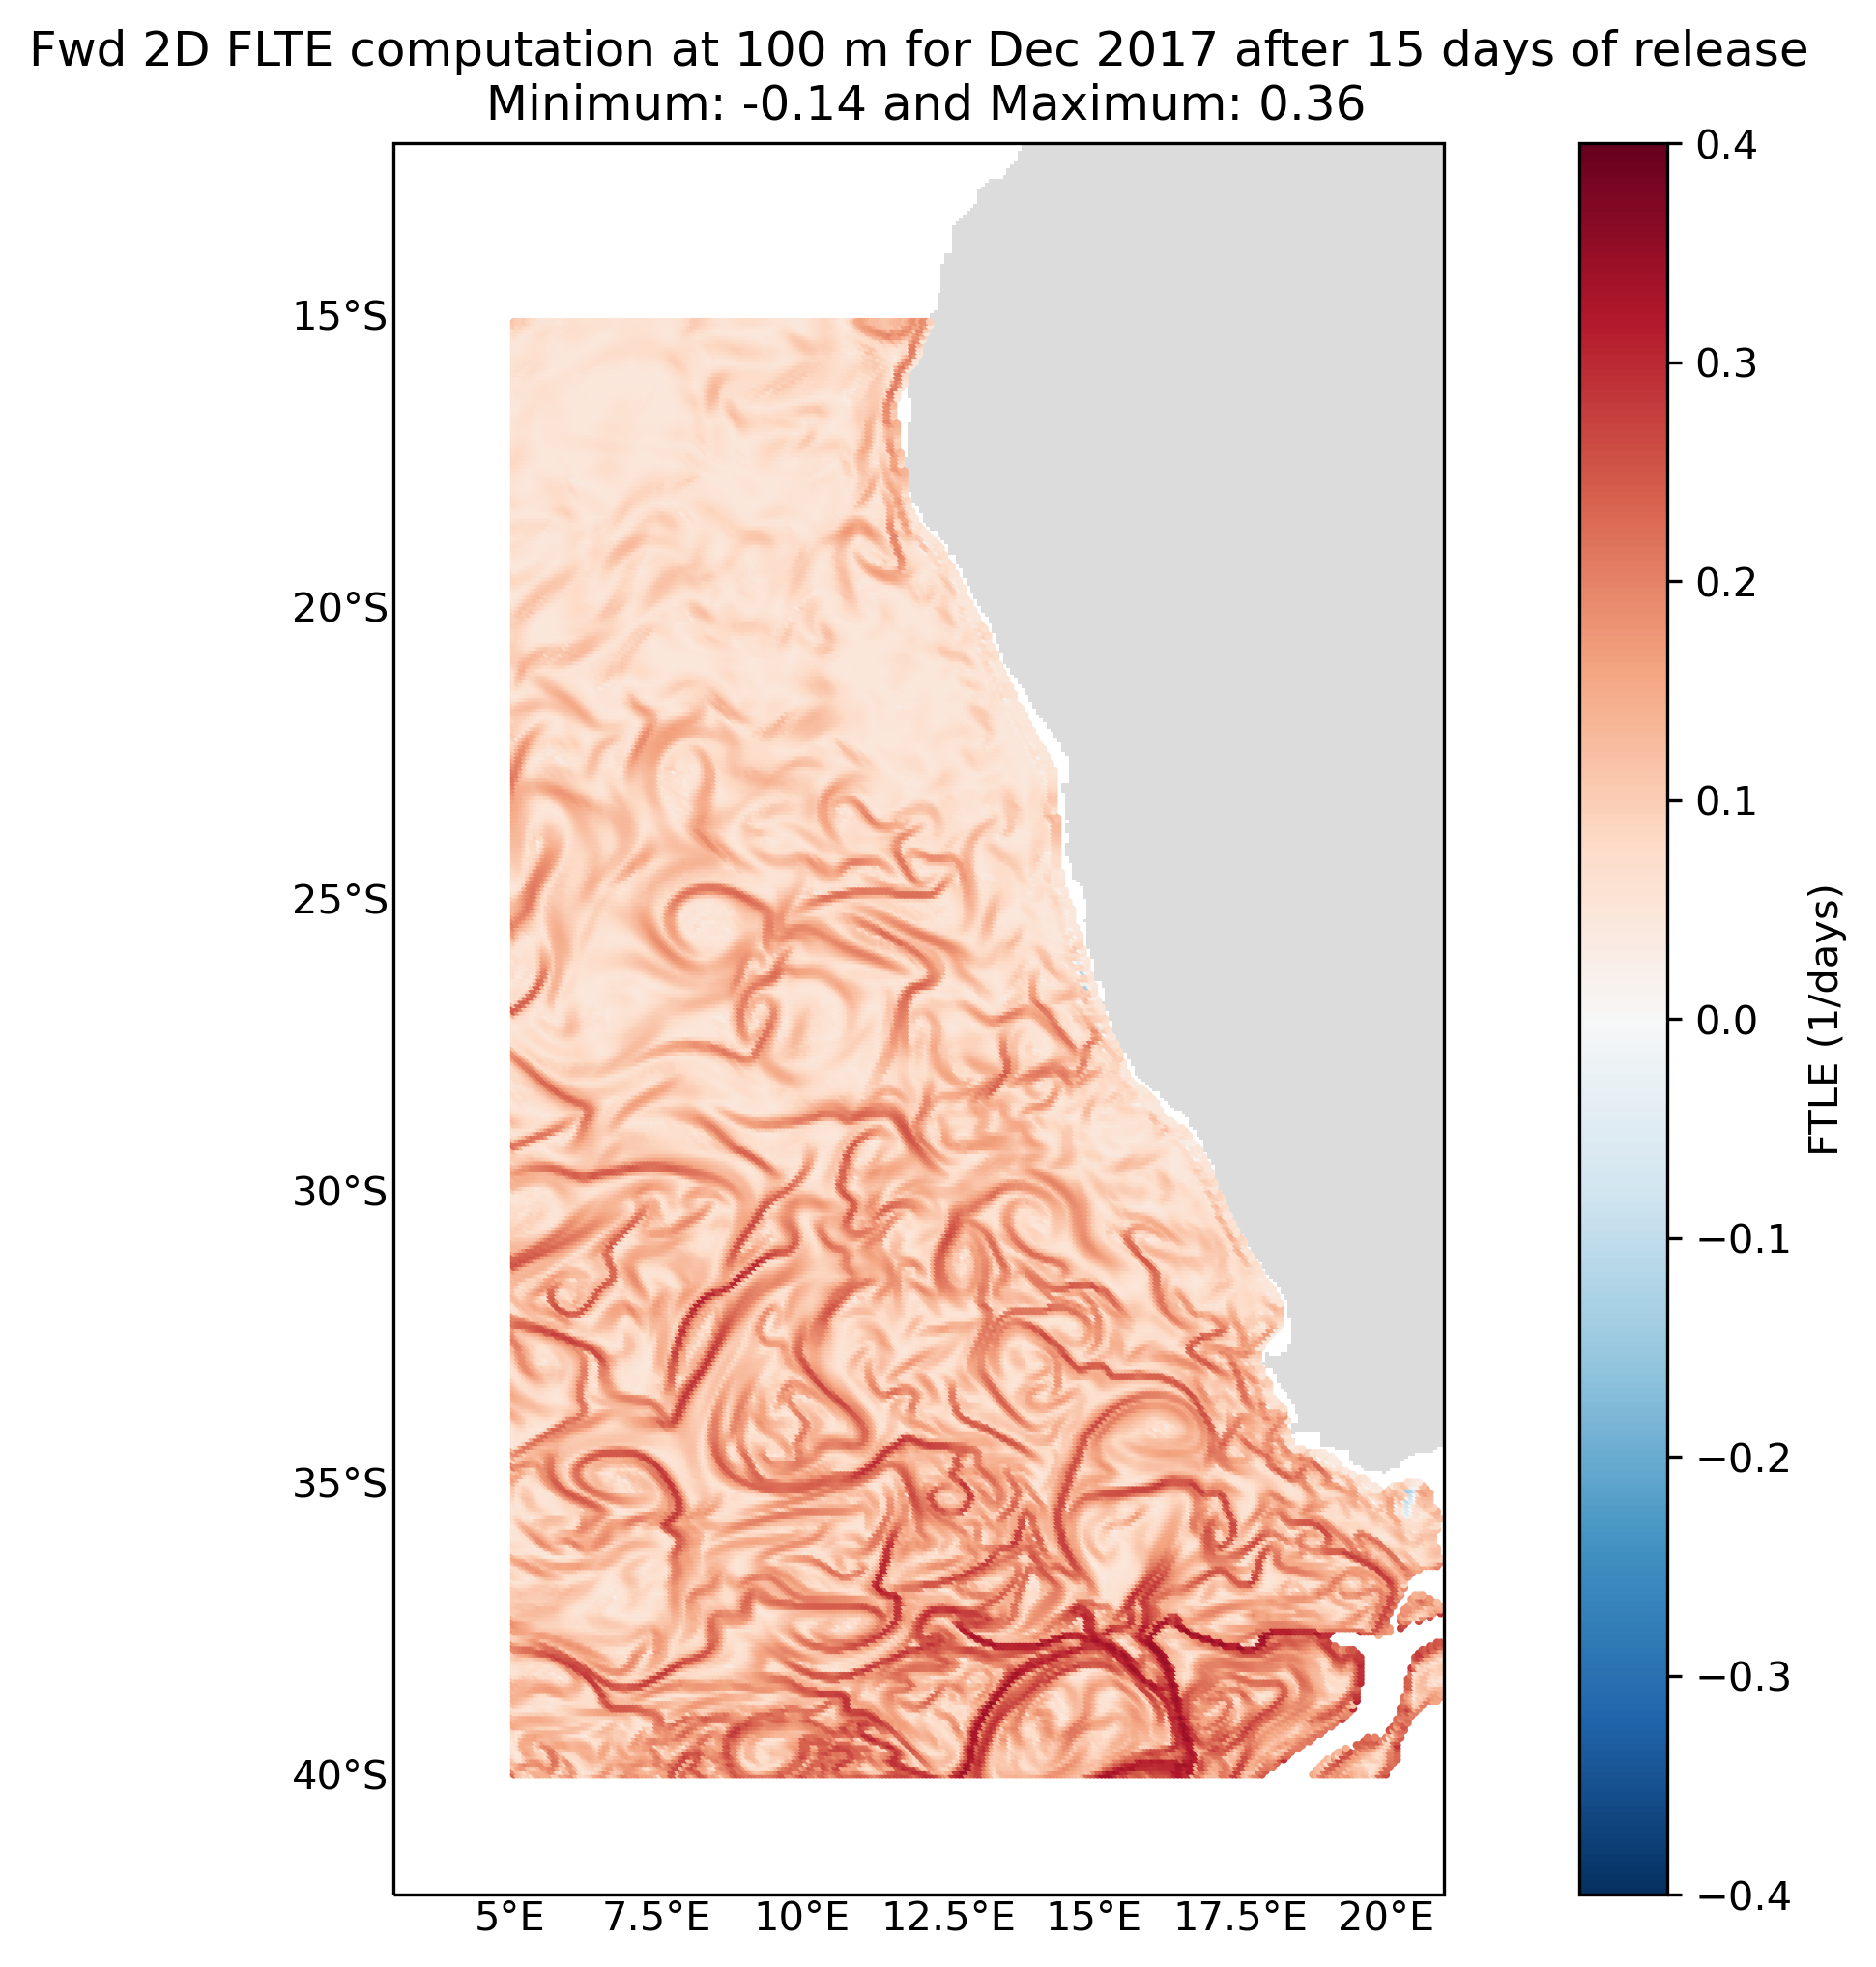

In [13]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
# ax.set_xlim(10, 20)
# ax.set_ylim(-35, -20)
ax.set_xlim(3, 21)
ax.set_ylim(-42, -12)
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)

plt.scatter(coords['Longitude'], coords['Latitude'], c=FTLE_f, cmap='RdBu_r', s=1)
plt.title('{6} {5} FLTE computation at {7} m for {0} {1} after {4} days of release\n Minimum: {2} and Maximum: {3}'.format(mon_name, year, np.round(np.nanmin(FTLE_f),2), np.round(np.nanmax(FTLE_f),2), Td, dim, asc_order,r_depth))
cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")
plt.clim(-0.4, 0.4)
plt.savefig(output_folder + '{0}_{1}_FTLE_Benguela_0625_401x257_{2}01-31_{3}_{4}z.jpeg'.format(asc_order, dim, mon_name, year, r_depth))


<h3>Crop the FTLE output-only for analysis

In [14]:
coords0, coords1 = 401, 257

x0 = np.reshape(coords['Longitude'], (coords0, coords1)) 
y0 = np.reshape(coords['Latitude'], (coords0, coords1))
f= np.reshape(FTLE_f, (coords0, coords1))

modified_ds = xr.Dataset(

    data_vars=dict(

        FTLE=(["x", "y"], f)

    ),

    coords=dict(

        lon=(["x", "y"], x0),

        lat=(["x", "y"], y0)

    ),

    attrs=dict(description="FTLE field"),

)
modified_ds

<xarray.Dataset>
Dimensions:  (x: 401, y: 257)
Coordinates:
    lon      (x, y) float64 5.0 5.062 5.125 5.188 ... 20.81 20.88 20.94 21.0
    lat      (x, y) float64 -40.0 -40.0 -40.0 -40.0 ... -15.0 -15.0 -15.0 -15.0
Dimensions without coordinates: x, y
Data variables:
    FTLE     (x, y) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    description:  FTLE field

In [15]:
left_lon = 10
right_lon = 20
top_lat = -20
bottom_lat = -35
ds_cropped = modified_ds.where((modified_ds.lat>bottom_lat) & (modified_ds.lat<top_lat) & (modified_ds.lon>left_lon) & (modified_ds.lon<right_lon), drop=True)
ds_cropped

<xarray.Dataset>
Dimensions:  (x: 239, y: 159)
Coordinates:
    lon      (x, y) float64 10.06 10.12 10.19 10.25 ... 19.75 19.81 19.88 19.94
    lat      (x, y) float64 -34.94 -34.94 -34.94 -34.94 ... -20.06 -20.06 -20.06
Dimensions without coordinates: x, y
Data variables:
    FTLE     (x, y) float64 0.235 0.2396 0.2432 0.2402 ... nan nan nan nan
Attributes:
    description:  FTLE field

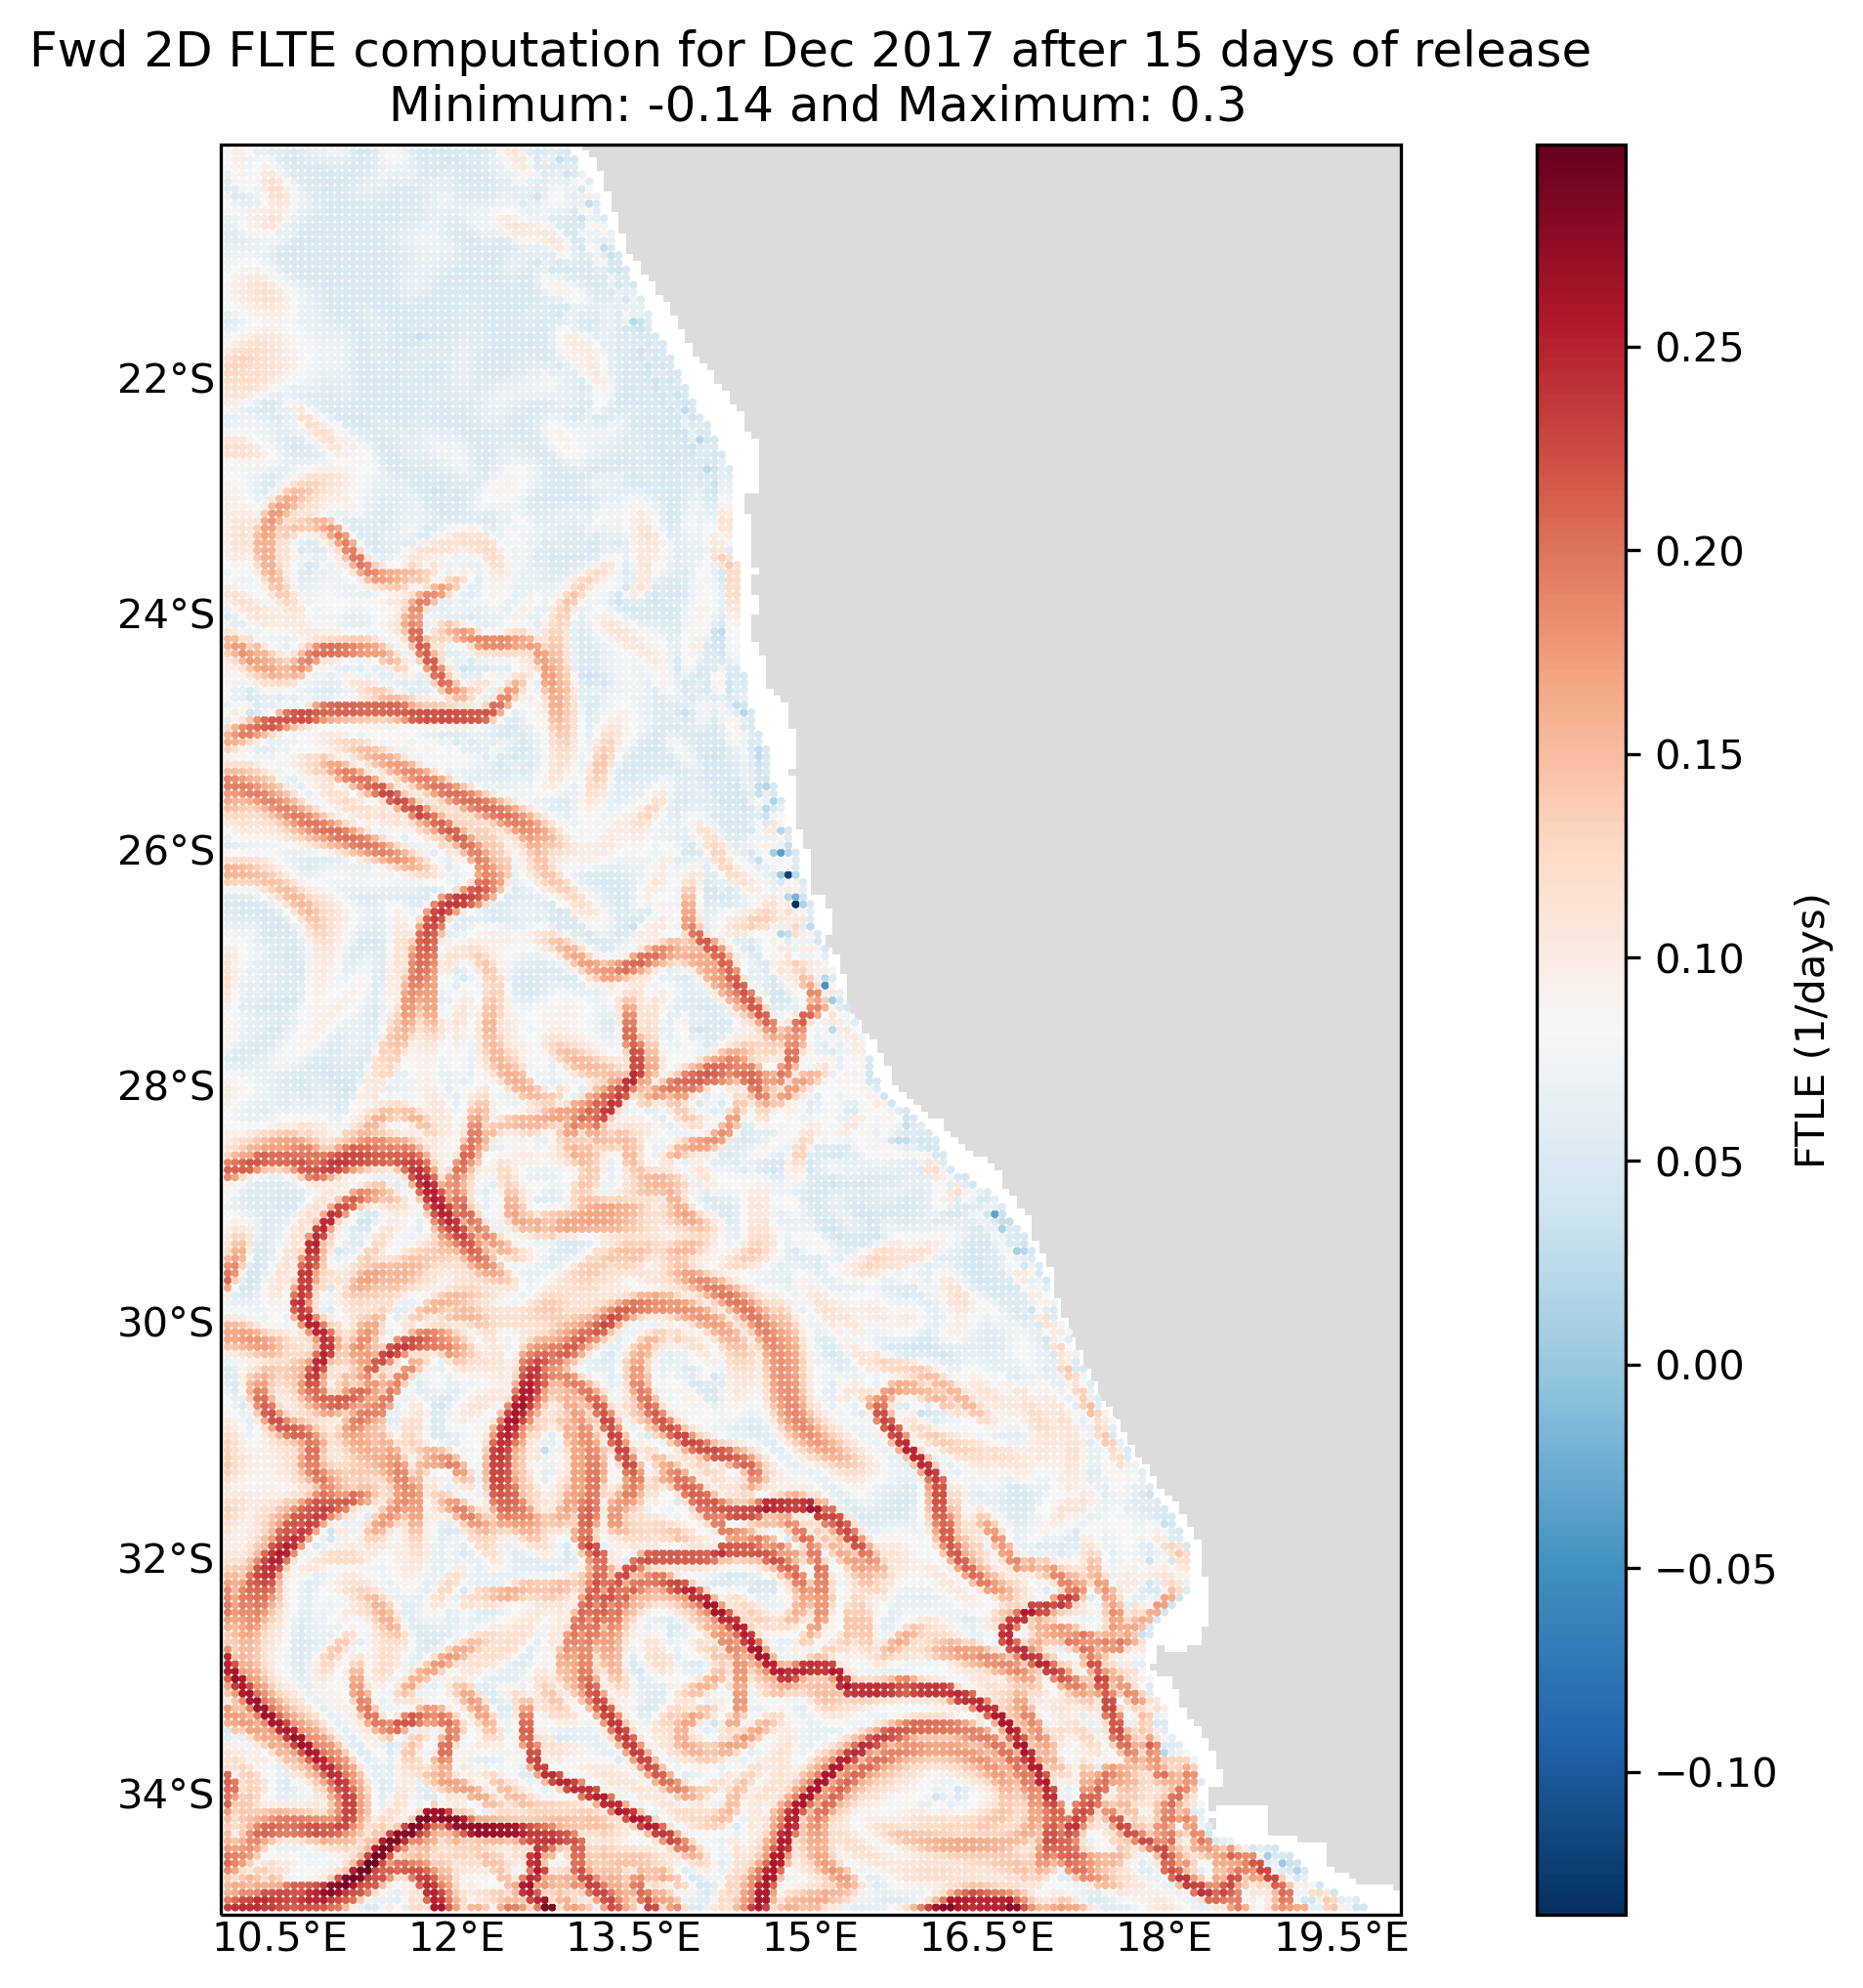

In [17]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
ax.set_xlim(10, 20)
ax.set_ylim(-35, -20)
# ax.set_xlim(3, 21)
# ax.set_ylim(-42, -12)
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)

plt.scatter(ds_cropped['lon'], ds_cropped['lat'], c=ds_cropped['FTLE'], cmap='RdBu_r', s=1)
ftle_min, ftle_max = np.round(np.nanmin(ds_cropped['FTLE']),2), np.round(np.nanmax(ds_cropped['FTLE']),2)
plt.title('{6} {5} FLTE computation for {0} {1} after {4} days of release\n Minimum: {2} and Maximum: {3}'.format(mon_name, year, ftle_min, ftle_max, Td, dim, asc_order))
cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")

plt.savefig(output_folder + 'plots/{0}_{1}_FTLE_Benguela_0625_401x257_{2}01-31_{3}_{4}z.jpeg'.format(asc_order, dim, mon_name, year, r_depth))

# np.min(ds_cropped.lat[:,0].values), np.max(ds_cropped.lat[:,0].values),np.min(ds_cropped.lon[:,0].values), np.max(ds_cropped.lon[:,0].values) 

/nethome/manra003/.conda/envs/dispersion/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/nethome/manra003/.conda/envs/dispersion/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


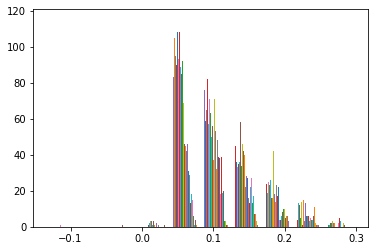

In [18]:
# Plot distribution of FTLE values on histogram
plt.hist(~np.isnan(ds_cropped['FTLE']), bins=10)
plt.show()

In [19]:
# only get values above threshold
# FTLE_tc = np.copy(ds_cropped['FTLE'])
# [FTLE_tc<0.2]=np.NaN
FTLE_bin=ds_cropped['FTLE']>0.16
FTLE_tc=np.copy(ds_cropped['FTLE'])
FTLE_tc[~FTLE_bin] = np.nan
FTLE_tc[~np.isnan(FTLE_tc)]=1

Text(0.5, 1.0, 'Fwd 2D FLTE computation for Dec 2017 after 15 days of release\n Minimum: -0.14 and Maximum: 0.3')

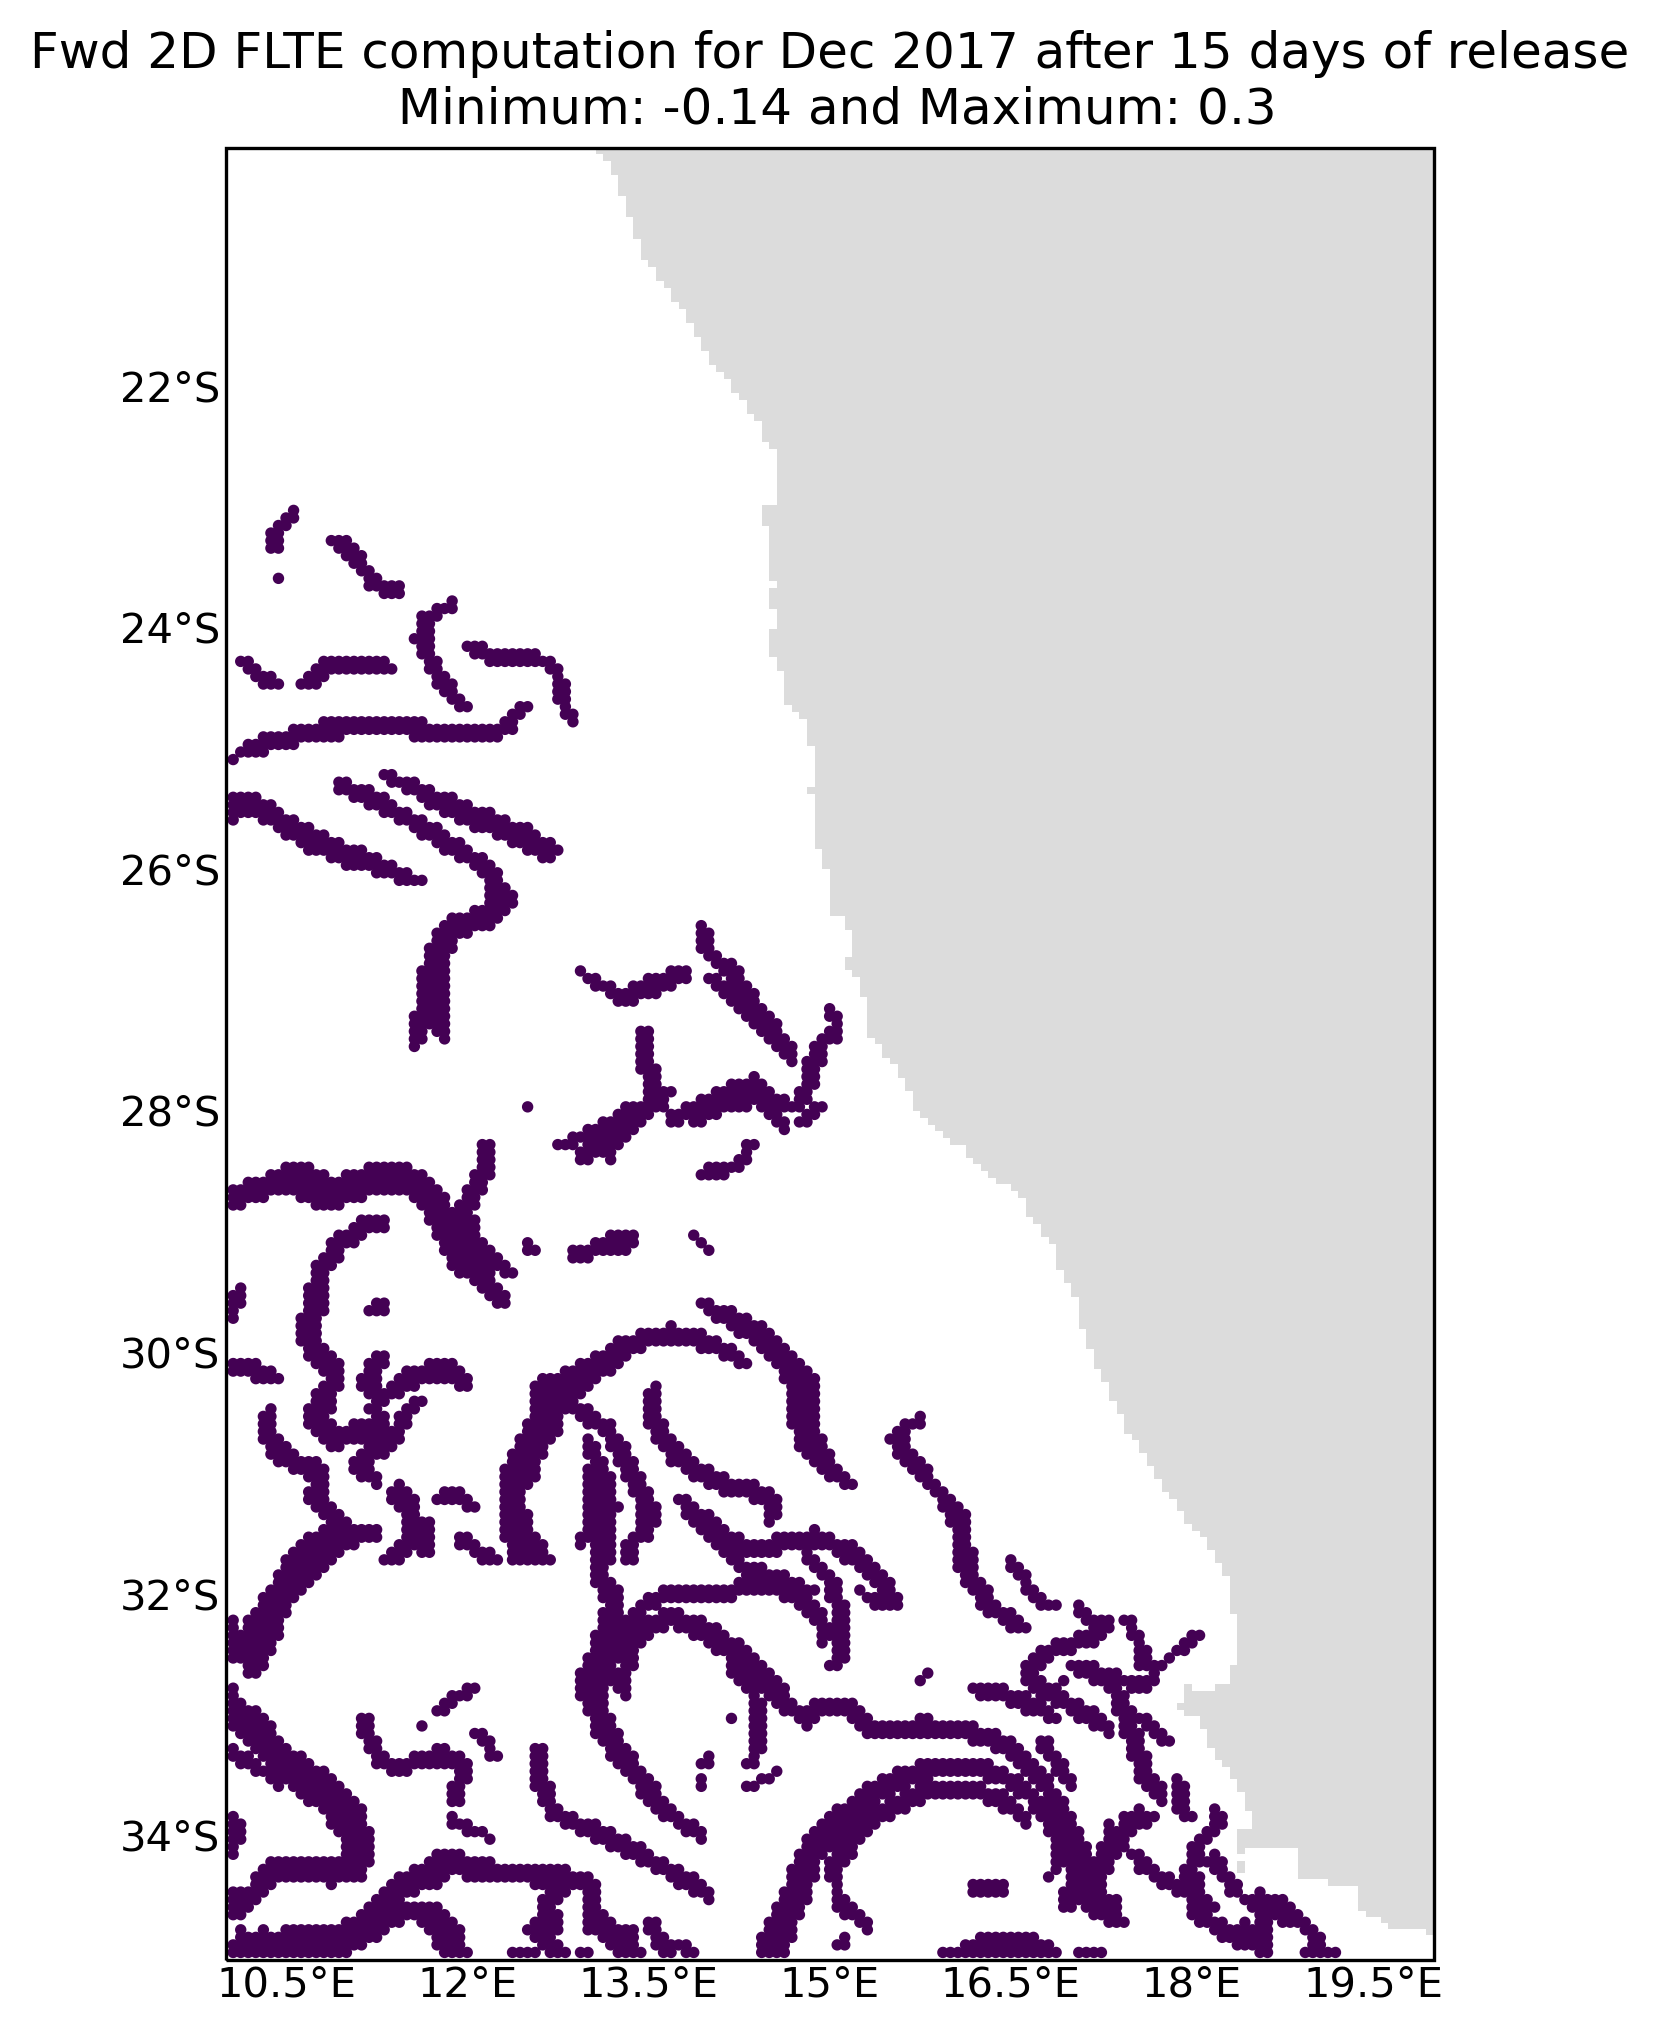

In [20]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
ax.set_xlim(10, 20)
ax.set_ylim(-35, -20)
colormap = colors.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)

plt.scatter(ds_cropped['lon'], ds_cropped['lat'], c=FTLE_tc, s=3)

plt.title('{6} {5} FLTE computation for {0} {1} after {4} days of release\n Minimum: {2} and Maximum: {3}'.format(mon_name, year, ftle_min, ftle_max, Td, dim, asc_order))

# cbar = plt.colorbar()
# cbar.set_label("FTLE (1/days)")
# plt.clim(0.2, 0.4)


<h3> Add temperature field below the highlighted FTLE (code from Env_fields_plot.ipynb file)

(-35.0, -20.0)

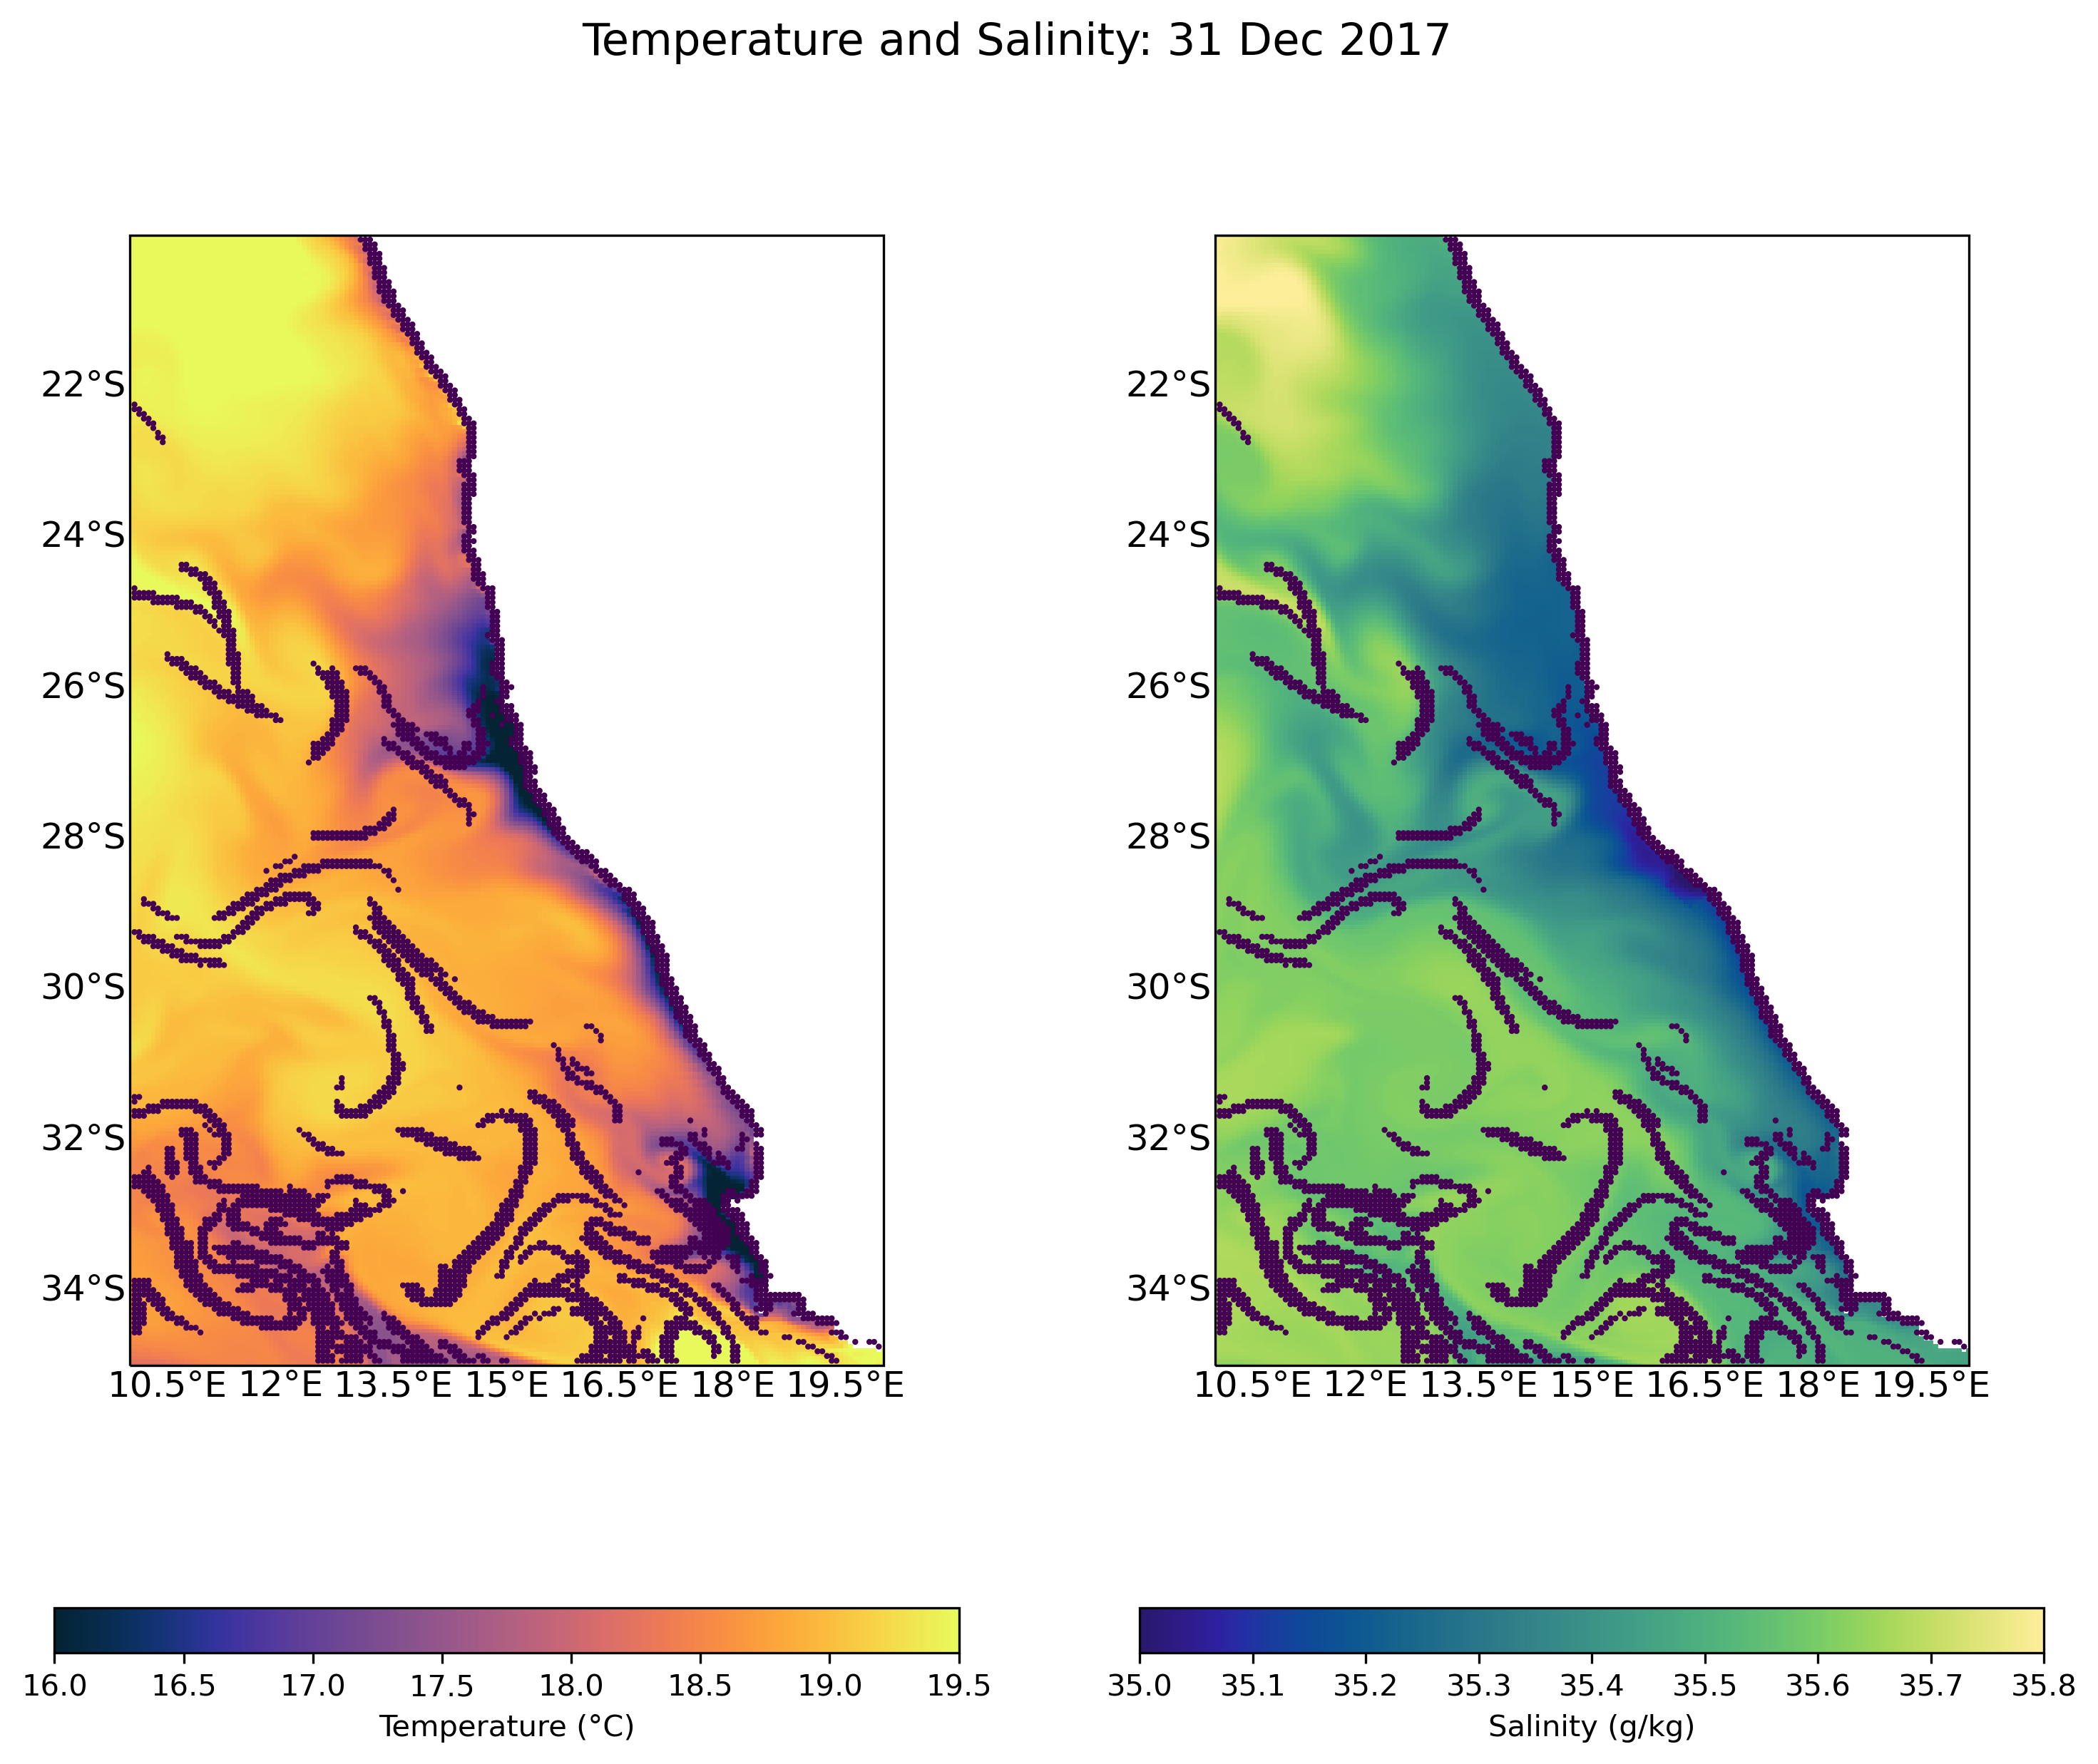

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

mes_date = 20171216

data_path = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/'
tfile = data_path + 'ROMEO.01_1d_thetao_{0}_grid_T.nc'.format(mes_date) 
temp_ds = xr.load_dataset(tfile)
sfile = data_path + 'ROMEO.01_1d_so_{0}_grid_T.nc'.format(mes_date)
sal_ds = xr.load_dataset(sfile)

custom_size=12
fig = plt.figure(figsize=(12,10), dpi=300)
fig.suptitle("Temperature and Salinity: 31 Dec 2017", fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=2)

temp_min, temp_max = 16, 19.5
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(temp_ds.nav_lon[1249:1750, 1499:], temp_ds.nav_lat[1249:1750, 1499:], temp_ds.thetao[0, 0, 1250:1750, 1500:], cmap=cmocean.cm.thermal, vmin=temp_min, vmax=temp_max)
ax1.scatter(ds_cropped['lon'], ds_cropped['lat'], c=FTLE_tc, s=1)

ax1.set_xlim(10,20)
ax1.set_ylim(-35,-20)

fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Temperature (°C)')

sal_min, sal_max = 35, 35.8
ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm2 = ax2.pcolormesh(sal_ds.nav_lon[1249:1750, 1499:], sal_ds.nav_lat[1249:1750, 1499:], sal_ds.so[0, 0, 1250:1750, 1500:], cmap=cmocean.cm.haline, vmin=sal_min, vmax=sal_max)
ax2.scatter(ds_cropped['lon'], ds_cropped['lat'], c=FTLE_tc, s=1)

cbar2 = fig.colorbar(pcm2, ax=ax2, orientation='horizontal', label = 'Salinity (g/kg)')
ax2.set_xlim(10,20)
ax2.set_ylim(-35,-20)

# plt.savefig(output_folder + '2017-12-31_TS.jpeg',bbox_inches='tight',
#             pad_inches=0.2)
